In [31]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2
from tqdm import tqdm
import tensorflow as tf
from tensorflow import keras 

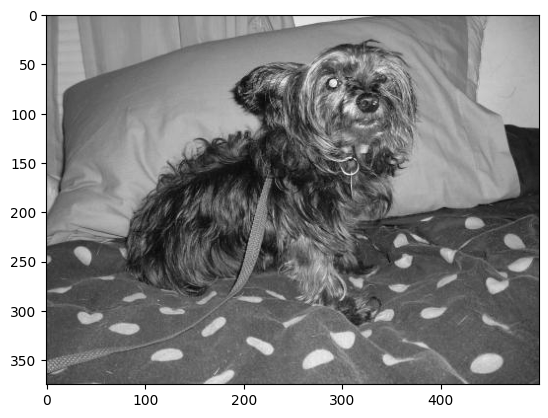

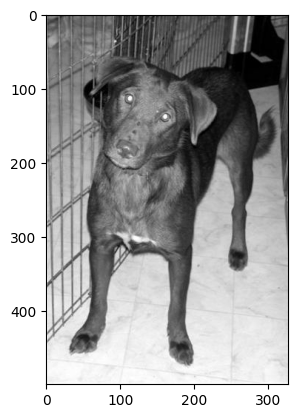

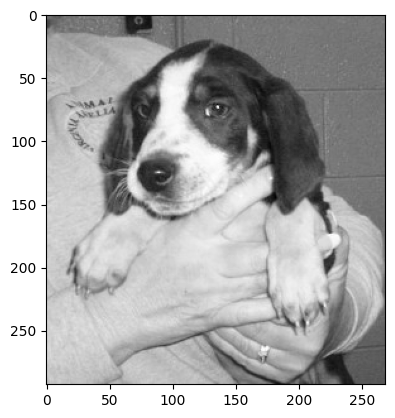

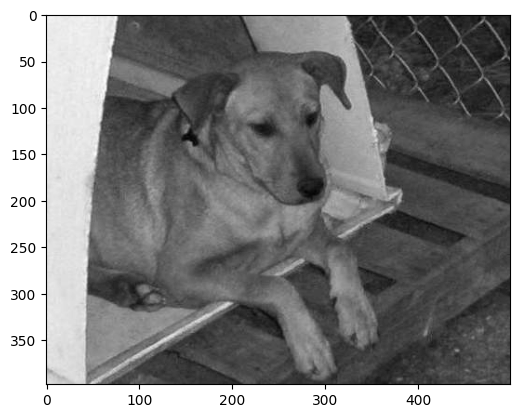

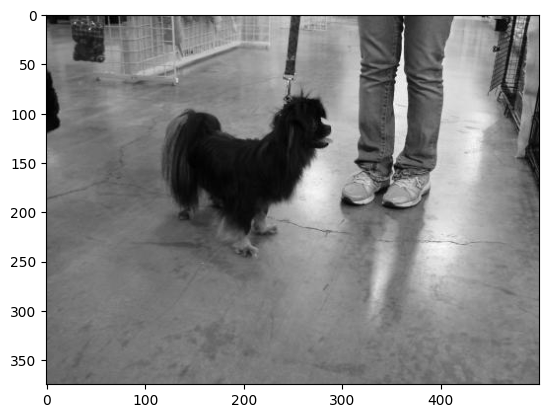

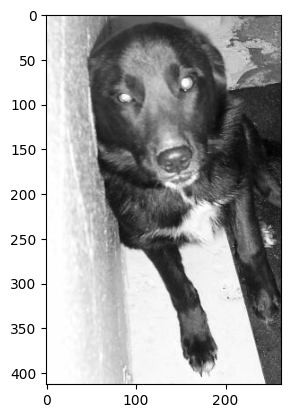

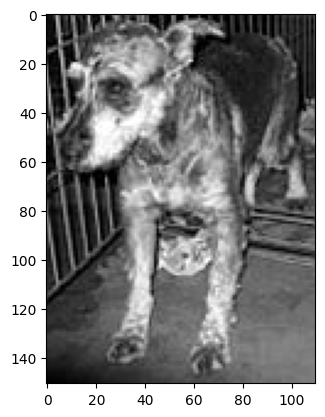

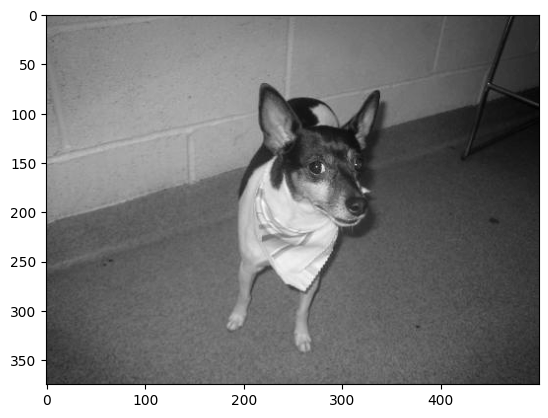

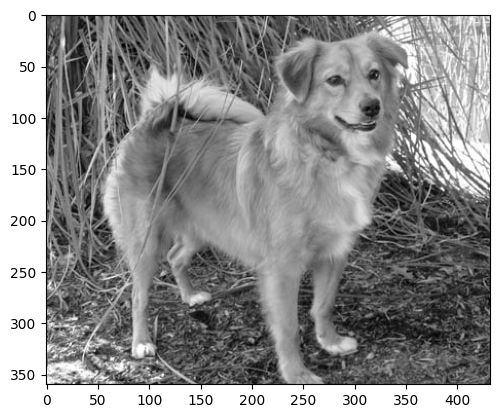

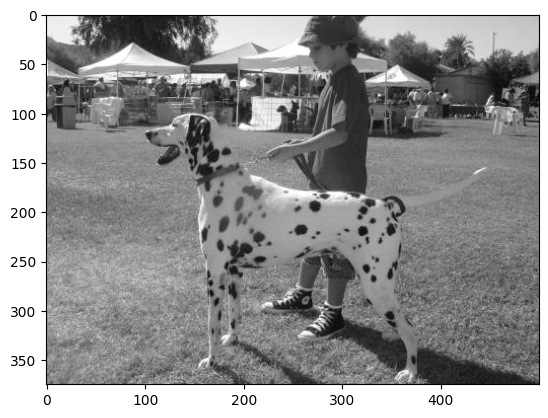

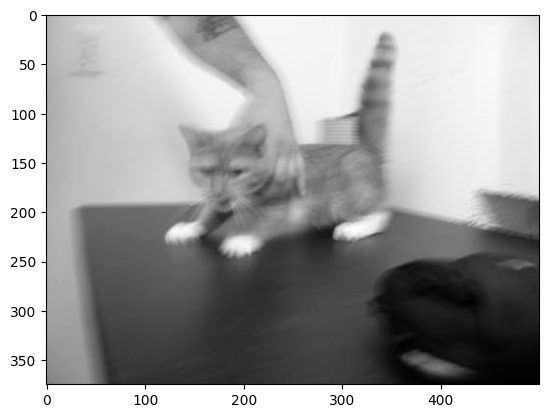

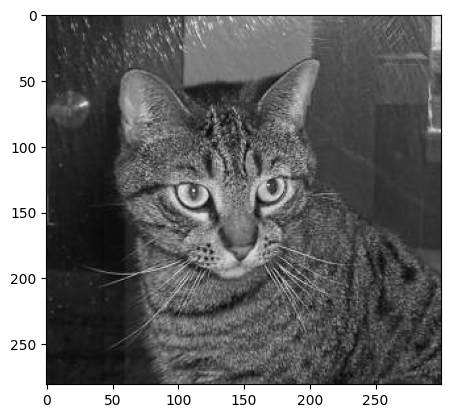

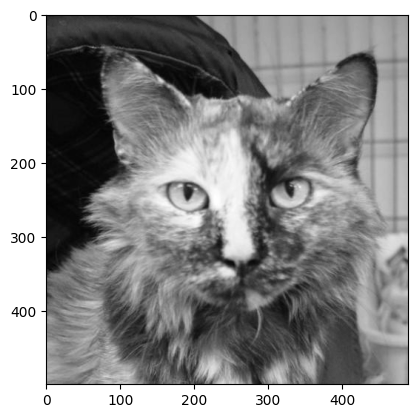

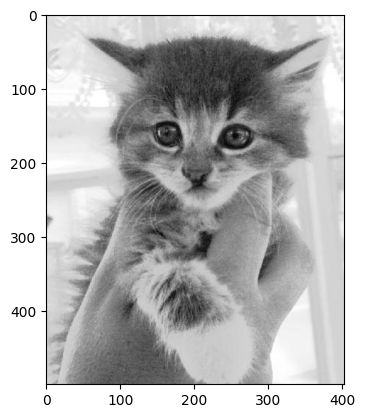

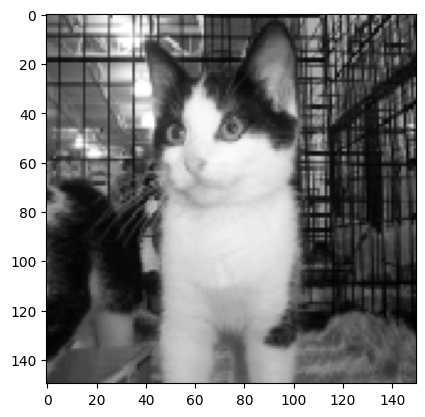

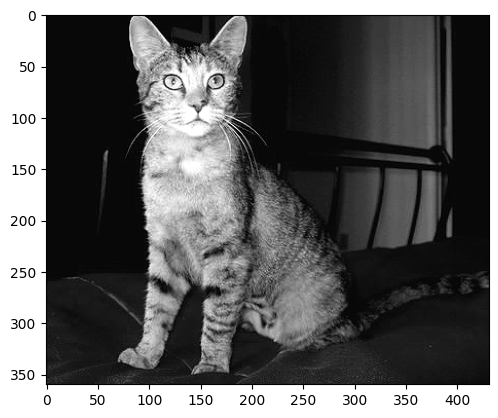

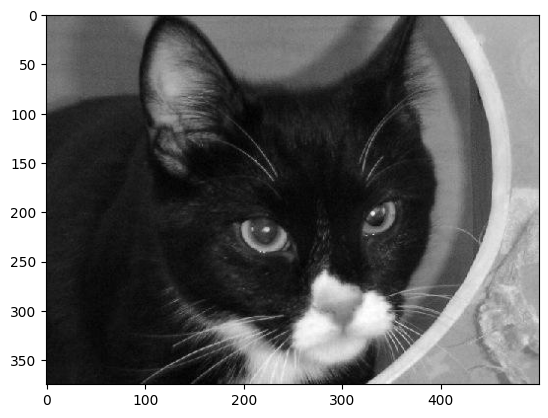

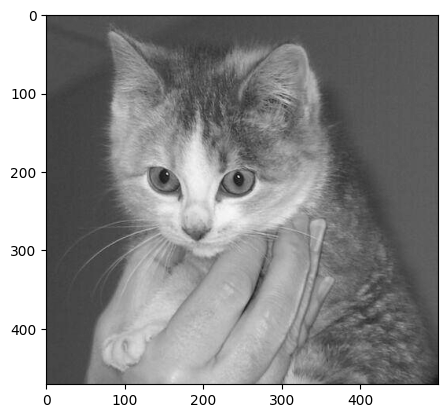

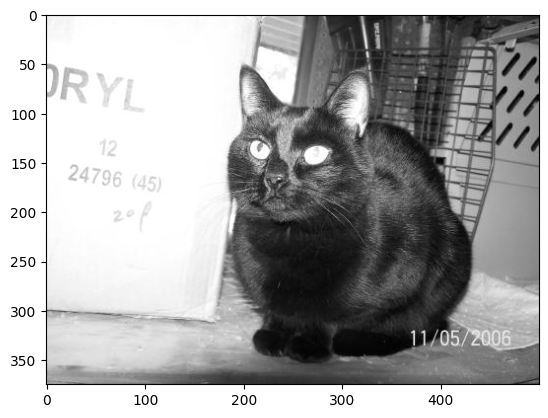

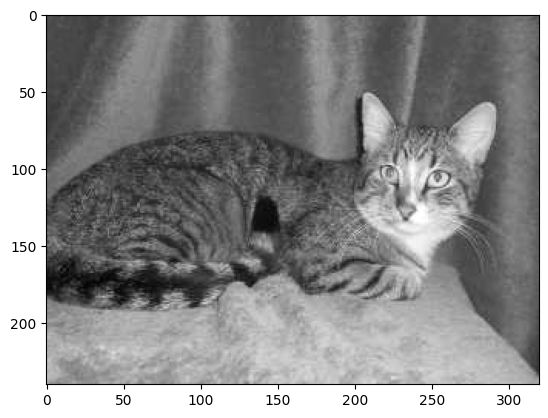

In [32]:
DATADIR = 'PetImages'
CATEGORIES = ["Dog","Cat"]
for category in CATEGORIES:
    path = os.path.join(DATADIR,category)
    x=0
    for img in os.listdir(path):
        x+=1
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap='gray')
        plt.show()
        if x==10:
            break

In [33]:
print(img_array)
print(img_array.shape)

[[ 75  80  84 ...  91  86  85]
 [ 75  79  83 ...  90  89  91]
 [ 75  78  82 ...  83  87  91]
 ...
 [180 175 170 ... 158 160 162]
 [179 169 158 ... 164 164 163]
 [180 166 149 ... 168 165 161]]
(240, 320)


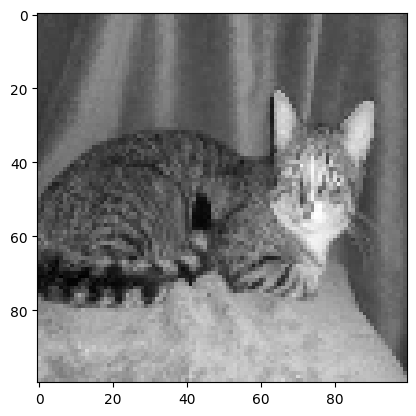

In [34]:
IMG_SIZE = 100
new_array = cv2.resize(img_array,(IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [35]:
training_data = []
def create_training_data():
    for category in CATEGORIES:
        
        
        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)
        
        for img in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
            
            
create_training_data()            

100%|██████████████████████████████████████████████████████████████████████████| 12501/12501 [00:09<00:00, 1275.85it/s]


In [36]:
print(training_data[0])

[array([[119, 108, 140, ..., 141, 138, 136],
       [124, 112, 138, ..., 147, 144, 139],
       [125, 117, 143, ..., 153, 149, 144],
       ...,
       [ 67,  96,  83, ...,  70,  67,  67],
       [ 77,  77,  82, ...,  70,  71,  69],
       [ 70,  78,  78, ...,  71,  88,  75]], dtype=uint8), 0]


In [37]:
print(training_data[:3])

[[array([[119, 108, 140, ..., 141, 138, 136],
       [124, 112, 138, ..., 147, 144, 139],
       [125, 117, 143, ..., 153, 149, 144],
       ...,
       [ 67,  96,  83, ...,  70,  67,  67],
       [ 77,  77,  82, ...,  70,  71,  69],
       [ 70,  78,  78, ...,  71,  88,  75]], dtype=uint8), 0], [array([[151, 120, 127, ...,  92, 112,  89],
       [128,  92,  87, ...,  84,  98,  82],
       [118,  76,  92, ...,  82,  93,  76],
       ...,
       [252, 247, 247, ..., 225, 230, 232],
       [249, 239, 240, ..., 232, 235, 231],
       [251, 242, 241, ..., 241, 239, 238]], dtype=uint8), 0], [array([[118, 111,  95, ..., 122, 124, 122],
       [ 96, 102, 108, ..., 120, 124, 119],
       [ 76,  95, 103, ..., 120, 122, 122],
       ...,
       [205, 199, 196, ..., 100,  97,  92],
       [195, 208, 195, ...,  90,  93,  89],
       [188, 198, 194, ...,  92,  92,  94]], dtype=uint8), 0]]


In [38]:
print(training_data[500:510])

[[array([[184, 192, 159, ..., 136, 123, 115],
       [159, 181, 163, ..., 130, 120, 133],
       [193, 180, 182, ..., 118, 135, 126],
       ...,
       [125, 121, 139, ..., 115, 128, 117],
       [112, 115, 136, ...,  98, 126, 129],
       [109, 125, 124, ..., 114, 129, 113]], dtype=uint8), 0], [array([[ 26,  26,  30, ...,  52,  58,  62],
       [ 29,  27,  27, ...,  50,  52,  58],
       [ 25,  32,  29, ...,  65,  68,  67],
       ...,
       [114, 107, 102, ...,  88,  93,  82],
       [122, 145, 100, ...,  78,  82,  84],
       [144, 116, 137, ...,  87,  97,  94]], dtype=uint8), 0], [array([[143, 151, 139, ..., 138, 142, 142],
       [158, 152, 143, ..., 135, 144, 145],
       [164, 153, 145, ..., 124, 130, 138],
       ...,
       [138, 118, 123, ..., 199, 206, 202],
       [125, 136, 128, ..., 195, 183, 192],
       [129, 143, 136, ..., 170, 156, 194]], dtype=uint8), 0], [array([[ 51,  52,  49, ...,   2,   2,   2],
       [ 54,  50,  50, ...,   2,   2,   2],
       [ 55,  52,  51,

In [39]:
import random 
random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample[1])

0
1
0
0
0
1
1
1
0
0


In [40]:
x = []
y = []

for features,label in training_data:
    x.append(features)
    y.append(label)
    
x = np.array(x).reshape(-1, IMG_SIZE, IMG_SIZE)
y = np.array(y)

In [41]:
import pickle

pickle_out = open("x.pickle","wb")
pickle.dump(x, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

pickle_in = open("x.pickle","rb")
x = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [42]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(19956, 100, 100)
(4990, 100, 100)
(19956,)
(4990,)


In [43]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(IMG_SIZE,IMG_SIZE)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dense(2, activation=tf.nn.softmax)
])

In [44]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [45]:
model.fit(x_train,y_train, epochs=10)

Epoch 1/10
624/624 [==============================] - 16s 25ms/step - loss: 16.0876 - sparse_categorical_accuracy: 0.5162
Epoch 2/10
624/624 [==============================] - 16s 26ms/step - loss: 0.8651 - sparse_categorical_accuracy: 0.5455
Epoch 3/10
624/624 [==============================] - 16s 26ms/step - loss: 0.8534 - sparse_categorical_accuracy: 0.5461
Epoch 4/10
624/624 [==============================] - 16s 26ms/step - loss: 0.7065 - sparse_categorical_accuracy: 0.5582
Epoch 5/10
624/624 [==============================] - 16s 26ms/step - loss: 0.6851 - sparse_categorical_accuracy: 0.5790
Epoch 6/10
624/624 [==============================] - 16s 26ms/step - loss: 0.6779 - sparse_categorical_accuracy: 0.5813
Epoch 7/10
624/624 [==============================] - 17s 27ms/step - loss: 0.7312 - sparse_categorical_accuracy: 0.5586
Epoch 8/10
624/624 [==============================] - 17s 27ms/step - loss: 0.7307 - sparse_categorical_accuracy: 0.5535
Epoch 9/10
624/624 [===========

In [46]:
test_loss, test_acc = model.evaluate(x_test,y_test)
test_acc

156/156 [==============================] - 1s 4ms/step - loss: 0.6884 - sparse_categorical_accuracy: 0.5327


0.5326653122901917

In [47]:
output = model.predict(x_test)
y_pred = np.argmax(output, axis = 1)

156/156 [==============================] - 1s 4ms/step


In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.57      0.53      0.55      2661
           1       0.50      0.53      0.52      2329

    accuracy                           0.53      4990
   macro avg       0.53      0.53      0.53      4990
weighted avg       0.53      0.53      0.53      4990



In [49]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[1417 1088]
 [1244 1241]]


In [50]:
model.save('model.h1')

INFO:tensorflow:Assets written to: model.h1\assets
